<a href="https://colab.research.google.com/github/wkdtjrrb/SPIDER/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
!ls

/content/drive/My Drive/TeamSpider/HousePrice
data_description.txt   sample_submission.csv  test.csv
PricePrediction.ipynb  Team		      train.csv


In [ ]:
cd '/content/drive/MyDrive/TeamSpider/HousePrice'

/content/drive/MyDrive/TeamSpider/HousePrice


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
path = './train.csv'
df = pd.read_csv(path)
ob = df.select_dtypes(include = 'object')
num = df.select_dtypes(exclude = 'object')

In [ ]:
path1 = './test.csv'
td = pd.read_csv(path1)

In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df.shape

(1460, 81)

In [ ]:
#numerical data 처리
num.shape

(1460, 38)

In [ ]:
num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
nn_col = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in nn_col:
    col_mean = df[col].mean()
    df[col].fillna(col_mean,inplace = True)

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
#correlation(절댓값) 순위
corr_mat = df.corr()
corr_saleprice = corr_mat.abs()['SalePrice'].sort_values(ascending=False)
corr_saleprice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [ ]:
#|corrlation| = 0.3를 기준으로 상관관계가 낮은 feature들을 삭제
df = df.drop(['HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'OverallCond',
       'MoSold', '3SsnPorch', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal',
       'BsmtHalfBath', 'BsmtFinSF2'],axis = 1)
num = df.select_dtypes(exclude = 'object')

In [ ]:
#feature 삭제 후 correlation(절댓값) 순위
corr_mat = df.corr()
corr_saleprice = corr_mat.abs()['SalePrice'].sort_values(ascending=False)
corr_saleprice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [ ]:
corr_saleprice.index.tolist

<bound method IndexOpsMixin.tolist of Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')>

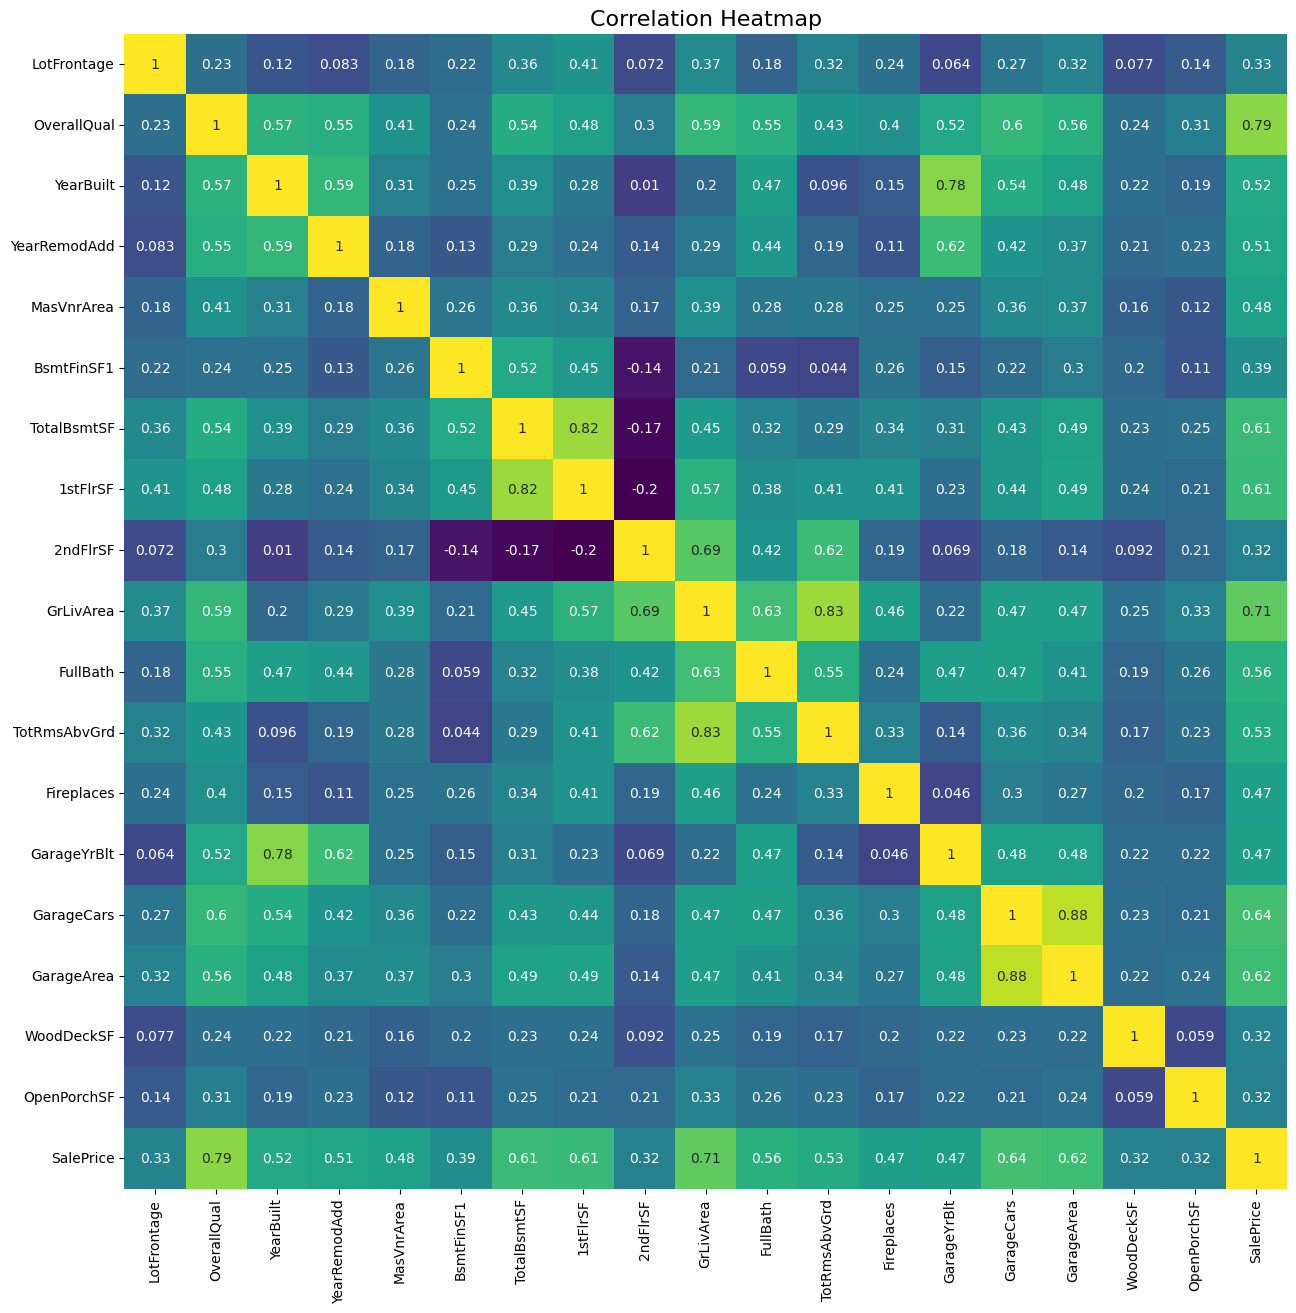

In [ ]:
#correlation heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, cmap='viridis', annot=True, cbar = False)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [ ]:
#이상치 삭제 : 전체데이터에 대해 이상치를 삭제하는 경우 df.shape이 (423, 76이 됨)
#correlation 이 0.3이상인 경우를 사용
num_features = num.columns.tolist()
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [ ]:
df.shape #삭제한 19개의 feature들

(1033, 62)

In [ ]:
df.dtypes

MSZoning          object
LotFrontage      float64
Street            object
Alley             object
LotShape          object
                  ...   
Fence             object
MiscFeature       object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 62, dtype: object

In [ ]:
ob.isnull().sum() # object data중 nan값이 많은 alley와 fireplaceQu, PoolQC와 Fence, MiscFeature은 버리고
#나머지는 최빈값으로 처리

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1) # nan 이 많은 feature 삭제

In [ ]:
ob = df.select_dtypes(include = 'object')
ob.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for col in ob.columns:
  df[col].fillna(df[col].mode()[0],inplace = True)

In [ ]:
df.dtypes

MSZoning          object
LotFrontage      float64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64


In [ ]:
ob.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        5
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      1
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       55
GarageFinish     55
GarageQual       55
GarageCond       55
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [ ]:
df.dropna(subset = ob.columns,inplace=True)

In [ ]:
df.dtypes

MSZoning          object
LotFrontage      float64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64


In [ ]:
# 모든 결측치가 사라진 것을 확인
ob = df.select_dtypes(include = 'object')
ob.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
ob.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     23
Condition1        9
Condition2        5
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          6
Exterior1st      14
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        5
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        6
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
df.dtypes

MSZoning          object
LotFrontage      float64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64


In [ ]:
df1 =

In [ ]:
df2 = df

In [ ]:
df2.dtypes

MSZoning          object
LotFrontage      float64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64


In [ ]:
# one hot encoding for all ob data
df2 = pd.get_dummies(df2)

In [ ]:
df2.dtypes

LotFrontage              float64
OverallQual                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 239, dtype: object

In [ ]:
#corr > 0.5 인 데이터만 사용
df2 = df2.loc[:,['SalePrice','OverallQual','GrLivArea','YearBuilt','ExterQual_Gd','GarageCars','ExterQual_TA','FullBath','GarageFinish_Unf'
,'GarageArea','BsmtQual_Gd','YearRemodAdd','Foundation_PConc','GarageYrBlt','KitchenQual_TA','KitchenQual_Gd' ]]

In [ ]:
corr2_mat = df2.corr()
corr2_saleprice[corr2_saleprice>=0.5].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.769511
GrLivArea           0.666474
YearBuilt           0.635556
ExterQual_Gd        0.620252
GarageCars          0.609387
ExterQual_TA        0.599418
FullBath            0.593473
GarageFinish_Unf    0.584166
GarageArea          0.564906
BsmtQual_TA         0.560261
BsmtQual_Gd         0.556837
YearRemodAdd        0.551134
Foundation_PConc    0.540592
GarageYrBlt         0.523188
KitchenQual_TA      0.521244
KitchenQual_Gd      0.514643
Name: SalePrice, dtype: float64

In [ ]:
x2 = df2.drop('SalePrice',axis = 1)
y2 = df2['SalePrice']

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3,random_state = 10)

In [ ]:
reg2 = LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
y2_pred = reg2.predict(x2_test)

In [ ]:
r_square2 = reg2.score(x2_test, y2_test)
r_square2

0.8067759254689166

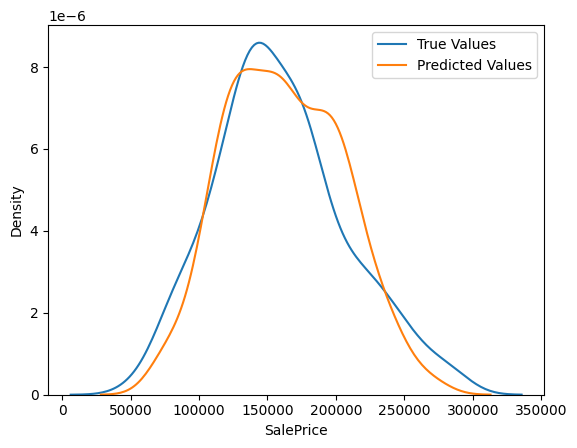

In [ ]:
sns.kdeplot(y2_test, label = "True Values")
sns.kdeplot(y2_pred, label = "Predicted Values")
plt.legend()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x2_train, y2_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
best_rf_model = RandomForestRegressor(n_estimators=200,
                               max_depth=15,
                               min_samples_split=2,
                               min_samples_leaf=1,max_features = 'sqrt')
best_rf_model.fit(x2_train,y2_train)
y2_pred = best_rf_model.predict(x2_test)
r_square3 = best_rf_model.score(x2_test, y2_test)
r_square3

0.8049645671881807

In [ ]:
sns.kdeplot(y2_test, label = "True Values")
sns.kdeplot(y2_pred, label = "Predicted Values")
plt.legend()
plt.show()

In [ ]:
path = './test.csv'
test = pd.read_csv(path)
test.head()

In [ ]:
test['ExterQual']

In [ ]:
test.isnull().sum()

In [ ]:
#결측값 처리
ob_test = test.select_dtypes(include = 'object')
num_test = test.select_dtypes(exclude = 'object')
for col in ob_test.columns:
  test[col].fillna(test[col].mode()[0],inplace = True)
for col in num_test.columns:
    col_mean = test[col].mean()
    test[col].fillna(col_mean,inplace = True)

In [ ]:
test['ExterQual'].isnull().sum()

In [ ]:
test_ohe = pd.get_dummies(test)
test = test.select_dtypes(exclude = 'object') # 기존의 Object 형 데이터 삭제
test = pd.concat([test,test_ohe])

In [ ]:
test_ohe = pd.get_dummies(test)
test_ohe.columns

In [ ]:
test = test.loc[:,['OverallQual','GrLivArea','YearBuilt','GarageCars','FullBath','GarageFinish','GarageArea','ExterQual','YearRemodAdd','GarageYrBlt']]
test.dtypes

In [ ]:
y_pred = best_rf_model.predict(test_part)